# 📚 Sistem Rekomendasi Buku
Sitem rekomendasi saat ini sedang menjadi tren. Saat ini berbelanja online merupakan pilihan yang lebih disukai masyarakat karena kemudahannya dan kecepatannya (Mathew, Praveena  et al., 2016). Pilihan barang - barang yang tersedia online juga semakin banyak, salah satunya adalah buku. Akan tetapi, pilihan yang beragam terkadang membuat konsumen kesulitan untuk memilik buku sesuai dengan preferensi mereka, baik buku secara fisik maupun buku elektronik (e-book). Mereka dapat membaca sinopisis yang tersedia atau sample halaman yang ada pada buku elektronik, tetapi hal tersebut akan memakan banyak waktu jika terdapat banyak buku yang dipertimbangkan. Oleh karena itu, dibutuhkan sistem rekomendasi buku yang membantu pengguna dalam memilih buku yang sesuai dengan preferensi mereka.

Selain untuk membantu pengguna, hal ini juga memberikan keuntungan untuk situs jual beli online yang menjual buku baik. Dengan merekomendasikan buku - buku yang kemungkinan akan dibeli oleh pengguna maka pendapatan mereka akan bertambah.

Sumber: P. Mathew, B. Kuriakose and V. Hegde, "Book Recommendation System through content based and collaborative filtering method," 2016 International Conference on Data Mining and Advanced Computing (SAPIENCE), Ernakulam, India, 2016, pp. 47-52, doi: 10.1109/SAPIENCE.2016.7684166.

Dataset: [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

# Data Understanding

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membaca data dari google drive dan menyimpan pada dataframe
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/Submisi Sistem Rekomendasi/dataset/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/Submisi Sistem Rekomendasi/dataset/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/Submisi Sistem Rekomendasi/dataset/Ratings.csv')

print('Jumlah data buku: ', len(books.ISBN.unique()))
print('Jumlah data user: ', len(users['User-ID'].unique()))
print('Jumlah data rating: ', len(ratings['User-ID']))
print('Jumlah data user yang memberi rating: ', len(ratings['User-ID'].unique()))

<ipython-input-3-39b0c079459e>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/Submisi Sistem Rekomendasi/dataset/Books.csv')


Jumlah data buku:  271360
Jumlah data user:  278858
Jumlah data rating:  1149780
Jumlah data user yang memberi rating:  105283


Terdapat 271.360 Judul buku, 278.858 pengguna, dan 1.149.780 rating dari 105.283 pengguna.

## Univariate Exploratory Data Analysis

### Books Variable

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Terdapat data null pada kolom Book-Author, Publisher, dan Image-URL-L

In [ ]:
# Menampilkan baris yang memiliki nilai null pada kolom book-author dan publisher
print(books[books['Book-Author'].isnull()])
print(books[books['Publisher'].isnull()])

              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author Year-Of-Publication                       Publisher  \
118033         NaN                1999              Dorling Kindersley   
187689         NaN                1995  Edinburgh Financial Publishing   

                                              Image-URL-S  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-M  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-L  
118033  http://images.amazon.com/images/P/0751352497.0...  
187689  http://images.amazon.com/images/P/9627982032.0...  
         

Terdapat 2 baris yang tidak memiliki pengarang dan 2 baris yang tidak memiliki penerbit

In [ ]:
# Menampilkan jumlah pengarang, jumlah penerbit, dan tahun terbit
print('Jumlah Pengarang: ', len(books['Book-Author'].unique()))
print('Jumlah Penerbit: ', len(books['Publisher'].unique()))
print('Tahun Terbit', books['Year-Of-Publication'].unique())

Jumlah Pengarang:  102023
Jumlah Penerbit:  16808
Tahun Terbit [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911

Dapat dilihat bahwa pada data tahun masih belum seragam, ada yang menggunakan tanda petik dan ada yang tidak. Selain itu, terdapat data yang salah, yaitu 'DK Publishing Inc' dan 'Gallimard' yang seharusnya berada pada kolom Publisher (penerbit).

In [ ]:
# Mengatur opsi tampilan Pandas agar tidak memotong string
pd.set_option('display.max_colwidth', None)

# Melihat data yang bernilai salah pada kolom year = 'DK Publishing Inc"
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [ ]:
# Melihat data yang bernilai salah pada kolom year = 'Gallimard"
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


Dapat dilihat bahwa kolom Year-Of-Publication, Book-Author, dan Publisher memiliki misfielded value karena nilainya tergeser akibat Book-Author yang nilainya bergabung dengan Book-Title.

In [ ]:
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,3462017942,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042509474X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006091985X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


Terdapat data judul buku sebesar 271.360 tetapi yang memiliki judul berbeda (unik) ada 102.022. Hal ini menunjukkan bahwa ada buku yang memiliki judul yang sama.

In [ ]:
duplicate_titles = books[books.duplicated(subset=['Book-Title'], keep=False)]['Book-Title'].value_counts()
print(duplicate_titles)

Book-Title
Selected Poems                                    27
Little Women                                      24
Wuthering Heights                                 21
The Secret Garden                                 20
Dracula                                           20
                                                  ..
Black Nationalism and the Revolution in Music      2
Chicken                                            2
The Baby                                           2
Selected Poetry (Poet to poet)                     2
Intercambios: Spanish for Global Communication     2
Name: count, Length: 19907, dtype: int64


Buku - buku yang memiliki judul dan pengarang yang sama tetapi memiliki ISBN yang berbeda mungkin saja terjadi jika penerbitnya berbeda atau karena adanya revisi atau edisi baru dengan perubahan konten atau format. Jadi hal ini adalah hal yang wajar, bukan suatu kesalahan.

### Users Variable

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Dapat dilihat bahwa terdapat banyak missing value pada kolom Age

In [ ]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


<Axes: >

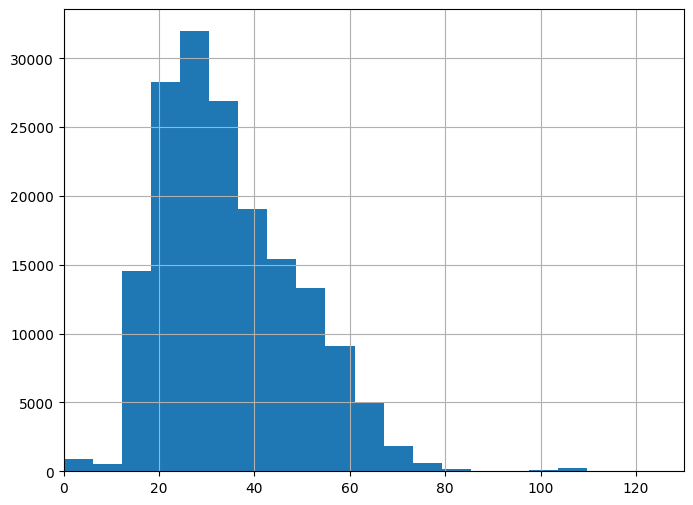

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.xlim([0, 130])
users.Age.hist(bins=40)

Age memiliki distribusi 'Right Skewed', distribusi data yang tidak simetris, dengan ekor yang lebih panjang di sisi kanan daripada sisi kiri. Pada distribusi Age di atas, terlihat ada data umur yang tidak masuk akal untuk mereview buku, yaitu di bawah 5 tahun dan di atas 90 tahun.

### Ratings Variable

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
pd.options.display.float_format = '{:.0f}'.format
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1149780,1149780,1149780
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,140386,NaN,3
std,80562,NaN,4
min,2,NaN,0
25%,70345,NaN,0
50%,141010,NaN,0
75%,211028,NaN,7


Berdasarkan informasi dataset pada sumbernya, kaggle, diketahui bahwa Penilaian buku (Book-Rating) memiliki dua jenis:

- Eksplisit: Penilaian ini diberikan secara langsung oleh pengguna dalam bentuk angka pada skala 1 hingga 10. Semakin tinggi angka yang diberikan, semakin tinggi apresiasi atau kesukaan pengguna terhadap buku tersebut.
- Implisit: Penilaian ini tidak diberikan secara langsung, melainkan ditandai dengan angka 0. Angka 0 ini mengindikasikan bahwa pengguna mungkin telah berinteraksi dengan buku tersebut (misalnya, melihat detailnya, menambahkannya ke daftar bacaan, atau melakukan tindakan lain), tetapi tidak memberikan penilaian eksplisit dalam skala 1-10.

Saya akan fokus membangun model collaborative filtering pada dara rating eksplisit, sehingga data rating implisit nantinya akan dihapus.

In [ ]:
# Menghitung data rating implisit
ratings.loc[ratings['Book-Rating'] == 0].count()

,0
User-ID,716109
ISBN,716109
Book-Rating,716109


# Data Preparation

## Data Cleaning

In [ ]:
# Menghapus kolom Image URL karena tidak digunakan pada analisis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [ ]:
# Mengisi nilai yang kosong pada kolom 'Book-Author' dan 'Publisher' dengan 'other'
books['Book-Author'] = books['Book-Author'].fillna('other')
books['Publisher'] = books['Publisher'].fillna('other')

In [ ]:
# Cek apakah data telah berhasil diubah menjadi 'other'
books.loc[books['Book-Author'] == 'other', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,other,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,other,1995,Edinburgh Financial Publishing


In [ ]:
# Memperpaiki nilai yang tergeser
books.loc[books['ISBN'] == '078946697X', 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books['ISBN'] == '078946697X', 'Book-Author'] = 'Michael Teitelbaum'
books.loc[books['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN'] == '078946697X', 'Publisher'] = 'DK Publishing Inc'

books.loc[books['ISBN'] == '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books['ISBN'] == '0789466953', 'Book-Author'] = 'James Buckley'
books.loc[books['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN'] == '0789466953', 'Publisher'] = 'DK Publishing Inc'

books.loc[books['ISBN'] == '2070426769', 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[books['ISBN'] == '2070426769', 'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books['ISBN'] == '2070426769', 'Year-Of-Publication'] = 2003
books.loc[books['ISBN'] == '2070426769', 'Publisher'] = 'Gallimard'

# Cek salah satu baris
books.loc[books['ISBN'] == '078946697X', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc


In [ ]:
# Konversi Year-Of-Publication ke string
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str)
# Ubah ke nilai NaN untuk tahun yang tidak valid, yaitu di atas 2025 dan dibawah 1000
books['Year-Of-Publication'] = books['Year-Of-Publication'].apply(lambda x: x if x.isdigit() and 1000 <= int(x) <= 2025 else np.nan)
# Konversi ke integer
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(float).astype('Int64')
# Imputasi Nilai Kosong dengan nilai median
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].median())

print(np.sort(books['Year-Of-Publication'].unique()))

[1376 1378 1806 1897 1900 1901 1902 1904 1906 1908 1909 1910 1911 1914
 1917 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2008 2010 2011 2012 2020 2021 2024]


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  Int64 
 4   Publisher            271360 non-null  object
dtypes: Int64(1), object(4)
memory usage: 10.6+ MB


In [ ]:
# Mengbah umur yang tidak masuk akal menjadi nan
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

# Gunakan random imputation pada nilai NaN, nilai random antar rentang 20-60
users.loc[users['Age'].isnull(), 'Age'] = np.random.randint(20, 61, size=users['Age'].isnull().sum())

# Pastikan hasilnya integer
users['Age'] = users['Age'].astype(int)

<Axes: >

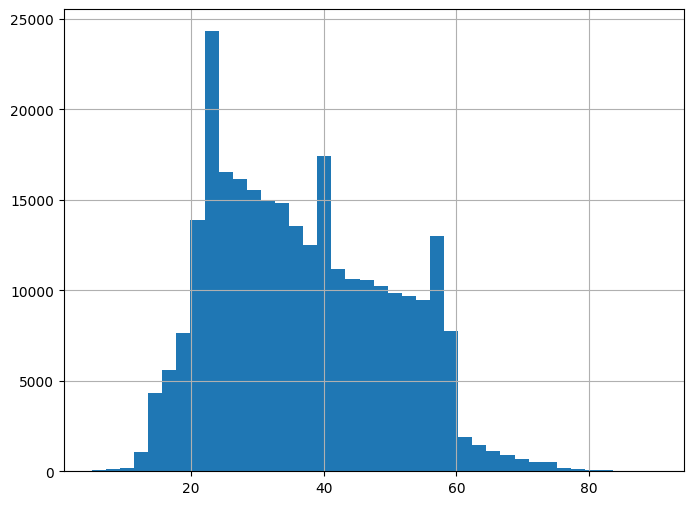

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
users.Age.hist(bins=40)

In [ ]:
# Ambil hanya data rating eksplisit
ratings_explicit = ratings[ratings['Book-Rating'] != 0]

print(f"Jumlah baris sebelum drop implisit: {len(ratings)}")
print(f"Jumlah baris setelah drop implisit: {len(ratings_explicit)}")

ratings = ratings_explicit

Jumlah baris sebelum drop implisit: 1149780
Jumlah baris setelah drop implisit: 433671


## Mengetahui Jumlah Rating

In [ ]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai User-ID
book_rating = pd.merge(ratings, books , on='ISBN', how='inner')
book_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch
...,...,...,...,...,...,...,...
383837,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner
383838,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholastic Edition,Paul Sloane,1997,Sterling Publishing
383839,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the Savvy Consumer,Clark Howard,2000,Longstreet Press
383840,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books


In [ ]:
# Filter data karena keterbatasan RAM
isbn_counts = book_rating['ISBN'].value_counts()

filtered_book_rating = book_rating[book_rating['ISBN'].isin(isbn_counts[isbn_counts >= 50].index)]

filtered_book_rating.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49565 entries, 3 to 383837
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              49565 non-null  int64 
 1   ISBN                 49565 non-null  object
 2   Book-Rating          49565 non-null  int64 
 3   Book-Title           49565 non-null  object
 4   Book-Author          49565 non-null  object
 5   Year-Of-Publication  49565 non-null  Int64 
 6   Publisher            49565 non-null  object
dtypes: Int64(1), int64(2), object(4)
memory usage: 3.1+ MB


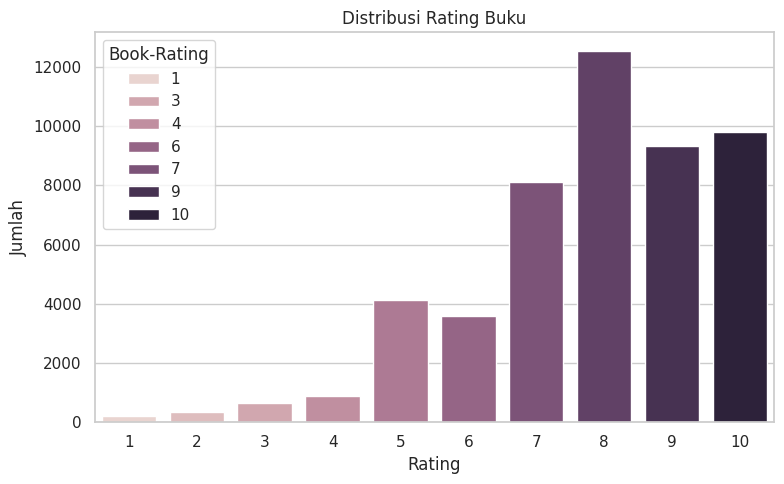

In [ ]:
# Atur style seaborn
sns.set(style="whitegrid")

# Plot distribusi rating
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_book_rating, x='Book-Rating', hue = 'Book-Rating')

plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Rating terbanyak yang diberikan adalah 8/10. Diikuti dengan 10, 9, 7, dan seterusnya menurun.

In [ ]:
# Membuat variabel preparation yang berisi dataframe book_rating kemudian mengurutkan berdasarkan User-ID
preparation = filtered_book_rating
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
248052,174216,002542730X,5,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
294791,209516,002542730X,9,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
244642,171602,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
366201,262902,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
236586,165582,002542730X,5,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
308853,221753,1878424319,5,The Four Agreements: A Practical Guide to Personal Freedom,Don Miguel Ruiz,1997,Amber-Allen Publishing
225696,157273,1878424319,8,The Four Agreements: A Practical Guide to Personal Freedom,Don Miguel Ruiz,1997,Amber-Allen Publishing
129695,90752,1878424319,8,The Four Agreements: A Practical Guide to Personal Freedom,Don Miguel Ruiz,1997,Amber-Allen Publishing
62922,39281,1878424319,8,The Four Agreements: A Practical Guide to Personal Freedom,Don Miguel Ruiz,1997,Amber-Allen Publishing


In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
11,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner
12,276755,0451166892,5,The Pillars of the Earth,Ken Follett,1996,Signet Book
22,276788,043935806X,7,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic
24,276796,0330332775,5,Bridget Jones's Diary,Helen Fielding,1997,Picador (UK)
...,...,...,...,...,...,...,...
29798,16919,0140119906,9,Love in the Time of Cholera (Penguin Great Books of the 20th Century),Gabriel Garcia Marquez,1994,Penguin Books
30693,17761,0553271636,9,D Is for Deadbeat (Kinsey Millhone Mysteries (Paperback)),Sue Grafton,1988,Bantam
34602,21462,0385720955,7,The Blind Assassin,Margaret Atwood,2001,Anchor Books/Doubleday
35319,22107,0446394521,9,Daisy Fay and the Miracle Man,Fannie Flagg,1992,Warner Books


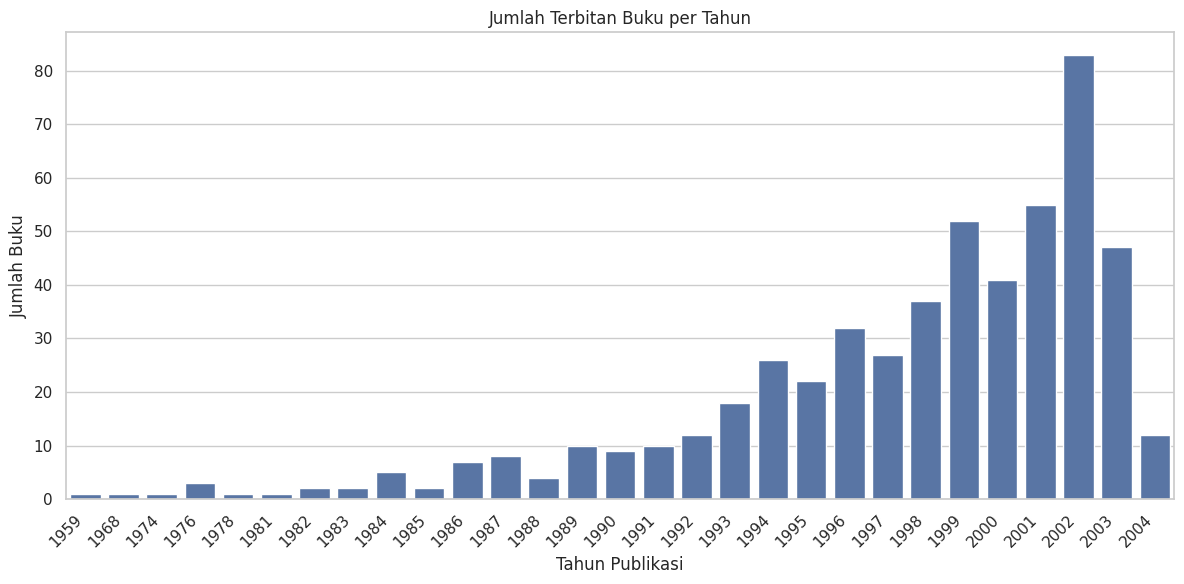

In [ ]:
# Visualisasi total buku dan tahun pada filtered_book_rating
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Of-Publication', data=preparation)
plt.title('Jumlah Terbitan Buku per Tahun')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()


Distribusi jumlah buku per tahun menunjukkan kurva left skewed dimana pada tahun - tahun lama jumlah buku sedikit tetapi di tahun yang lebih baru memiliki jumlah buku yang banyak terutama tahun 2002.

In [ ]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
book_id = preparation['ISBN'].tolist()

# Mengonversi data series 'Book-Title' menjadi dalam bentuk list
title = preparation['Book-Title'].tolist()

# Mengonversi data series 'Book-Author' menjadi dalam bentuk list
author = preparation['Book-Author'].tolist()

# Mengonversi data series 'Publisher' menjadi dalam bentuk list
publisher = preparation['Publisher'].tolist()

print(len(book_id))
print(len(title))
print(len(author))
print(len(publisher))

531
531
531
531


In [ ]:
# Membuat dictionary untuk data 'book_id', 'title', 'author', dan 'publisher'
book_new = pd.DataFrame({
    'id': book_id,
    'book_title': title,
    'book_author': author,
    'publisher': publisher
})
book_new

,id,book_title,book_author,publisher
0,038550120X,A Painted House,JOHN GRISHAM,Doubleday
1,0684867621,The Girl Who Loved Tom Gordon : A Novel,Stephen King,Scribner
2,0451166892,The Pillars of the Earth,Ken Follett,Signet Book
3,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,Scholastic
4,0330332775,Bridget Jones's Diary,Helen Fielding,Picador (UK)
...,...,...,...,...
526,0140119906,Love in the Time of Cholera (Penguin Great Books of the 20th Century),Gabriel Garcia Marquez,Penguin Books
527,0553271636,D Is for Deadbeat (Kinsey Millhone Mysteries (Paperback)),Sue Grafton,Bantam
528,0385720955,The Blind Assassin,Margaret Atwood,Anchor Books/Doubleday
529,0446394521,Daisy Fay and the Miracle Man,Fannie Flagg,Warner Books


# Model Development

## Content Based Filtering

In [ ]:
data = book_new
data.sample(5)

,id,book_title,book_author,publisher
282,0449212602,The Handmaid's Tale,Margaret Atwood,Fawcett Books
80,0440214041,The Pelican Brief,John Grisham,Dell
424,0553273914,The House of the Spirits,Isabel Allende,Bantam Books
477,014023313X,The Stone Diaries,Carol Shields,Penguin Books
326,080213825X,Four Blondes,Candace Bushnell,Grove Press


In [ ]:
data['features'] = (
    data['book_title'].fillna('') + ' ' +
    data['book_author'].fillna('') + ' ' +
    data['publisher'].fillna('')
)

### TF-IDF Vectorizer

In [ ]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Melakukan perhitungan idf pada data features
tfidf.fit(data['features'])

# Mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names_out()

array(['12', '13', '14', ..., 'zimmer', 'zone', 'zora'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(data['features'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(531, 1401)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.1244234 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.14156388],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.05028864],
       ...,
       [0.1244234 , 0.        , 0.        , ..., 1.        , 0.01877741,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01877741, 1.        ,
        0.        ],
       [0.        , 0.14156388, 0.05028864, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (531, 531)


book_title,Lies and the Lying Liars Who Tell Them: A Fair and Balanced Look at the Right,The Glass Lake,FORREST GUMP (Movie Tie in),High Five (A Stephanie Plum Novel),The Thorn Birds
book_title,,,,,
Tears of the Giraffe (No.1 Ladies Detective Agency),0,0,0,0,0
"Girl, Interrupted",0,0,0,0,0
Memoirs of a Geisha Uk,0,0,0,0,0
In Her Shoes : A Novel,0,0,0,0,0
The Last Juror,0,0,0,0,0
The Nanny Diaries: A Novel,0,0,0,0,0
A Time to Kill,0,0,0,0,0
"Artemis Fowl (Artemis Fowl, Book 1)",0,0,0,0,0
The Secret Life of Bees,0,0,0,0,0


### Inference

In [ ]:
# Fungsi untuk merekomendasikan buku
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['id', 'book_title', 'book_author', 'publisher']], k=5):
    index = similarity_data.loc[:, title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.book_title.eq('The Girl Who Loved Tom Gordon : A Novel')]

,id,book_title,book_author,publisher,features
1,0684867621,The Girl Who Loved Tom Gordon : A Novel,Stephen King,Scribner,The Girl Who Loved Tom Gordon : A Novel Stephen King Scribner


In [ ]:
book_recommendations('The Girl Who Loved Tom Gordon : A Novel')

,book_title,id,book_author,publisher
0,The Girl Who Loved Tom Gordon,0671042858,Stephen King,Pocket
1,From a Buick 8 : A Novel,0743211375,Stephen King,Scribner
2,Dreamcatcher,074343627X,Stephen King,Pocket
3,Dreamcatcher,0743211383,Stephen King,Scribner
4,Dreamcatcher,0743467523,Stephen King,Pocket


### Evaluasi

Dari inference ini, kita dapat mengukur presisi dari sistem rekomendasi buku menggunakan content based filtering ini menggunakan rumus:

$$
P = \frac{\text{of our recommendations that are relevant}}{\text{of items we recommended}}
$$

Dimana:
- $P$ adalah nilai Precision.
- *# of our recommendations that are relevant* adalah jumlah rekomendasi yang diberikan oleh sistem yang relevan bagi pengguna.
- *# of items we recommended* adalah jumlah total item yang direkomendasikan oleh sistem.

Dapat dilihat bahwa 5 buku yang direkomendasikan memiliki kesamaan dengan judul, penulis, dan penerbit,

Maka:

$$
\frac{\text{5 item relevan}}{\text{5 item yang direkomendasikan}} = 1
$$

## Collaborative Filtering

In [ ]:
# Membaca Dataset
df = filtered_book_rating[['User-ID', 'ISBN', 'Book-Rating']].copy()
df = df.rename(columns={'User-ID': 'user_id', 'ISBN': 'isbn', 'Book-Rating': 'rating'})
df

,user_id,isbn,rating
3,276744,038550120X,7
11,276754,0684867621,8
12,276755,0451166892,5
22,276788,043935806X,7
24,276796,0330332775,5
...,...,...,...
383777,276680,0743203631,7
383793,276681,0060930535,9
383794,276681,0060938455,9
383798,276681,0399144463,8


In [ ]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [276744, 276754, 276755, 276788, 276796, 276804, 276822, 276832, 276896, 276925, 276953, 276957, 276964, 276986, 276988, 277036, 277042, 277072, 277096, 277124, 277143, 277179, 277187, 277195, 277197, 277212, 277229, 277235, 277237, 277246, 277261, 277315, 277363, 277378, 277427, 277439, 277462, 277466, 277469, 277517, 277523, 277527, 277529, 277533, 277535, 277554, 277575, 277598, 277601, 277623, 277629, 277639, 277651, 277691, 277698, 277710, 277722, 277743, 277744, 277752, 277756, 277764, 277765, 277776, 277778, 277798, 277803, 277807, 277808, 277884, 277901, 277903, 277915, 277922, 277923, 277937, 277938, 277945, 277958, 277959, 277965, 277989, 277997, 278007, 278026, 278048, 278075, 278079, 278106, 278107, 278112, 278122, 278131, 278137, 278162, 278176, 278185, 278188, 278194, 278202, 278218, 278220, 278221, 278243, 278254, 278325, 278333, 278342, 278346, 278350, 278356, 278390, 278418, 278422, 278469, 278483, 278522, 278525, 278535, 278541, 278543, 278550, 278552, 

In [ ]:
# Mengubah isbn menjadi list tanpa nilai yang sama
book_ids = df['isbn'].unique().tolist()

# Melakukan proses encoding isbn
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke isbn
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [ ]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping isbn ke dataframe book
df['book'] = df['isbn'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_books = len(book_encoded_to_book)
print(num_books)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

20819
531
Number of User: 20819, Number of Book: 531, Min Rating: 1.0, Max Rating: 10.0


### Splitting Data

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,isbn,rating,user,book
238997,167800,0515136530,10,12771,107
229138,160393,0439139600,9,12221,143
41913,26240,0345370775,6,2036,277
177823,121935,0767902521,8,9304,254
182525,125060,0316601950,8,9556,70
...,...,...,...,...,...
88606,59727,0446601241,7,4714,340
347035,248170,0060977493,10,18774,135
300082,213941,0385730586,10,16105,155
6629,4107,0345380371,5,450,385


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[12771   107]
 [12221   143]
 [ 2036   277]
 ...
 [16105   155]
 [  450   385]
 [ 6667   494]] [1.         0.88888889 0.55555556 ... 1.         0.44444444 0.77777778]


### Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_books, 20) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6714 - root_mean_squared_error: 0.3067 - val_loss: 0.5702 - val_root_mean_squared_error: 0.2164
Epoch 2/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5473 - root_mean_squared_error: 0.1920 - val_loss: 0.5760 - val_root_mean_squared_error: 0.2223
Epoch 3/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5386 - root_mean_squared_error: 0.1837 - val_loss: 0.5693 - val_root_mean_squared_error: 0.2156
Epoch 4/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5352 - root_mean_squared_error: 0.1799 - val_loss: 0.5721 - val_root_mean_squared_error: 0.2188
Epoch 5/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5309 - root_mean_squared_error: 0.1751 - val_loss: 0.5667 - val_root_mean_squared_error: 0.2137
Epoch 6/100
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5270 - root_mean_squared_error: 0.1712 - val_loss: 0.5666 - val_root_mean_squared_error: 0.2138
Epoch 7/100
1240/1240 ━━━━━━━━━━━━

### Evaluasi dan Visualisasi Metrik

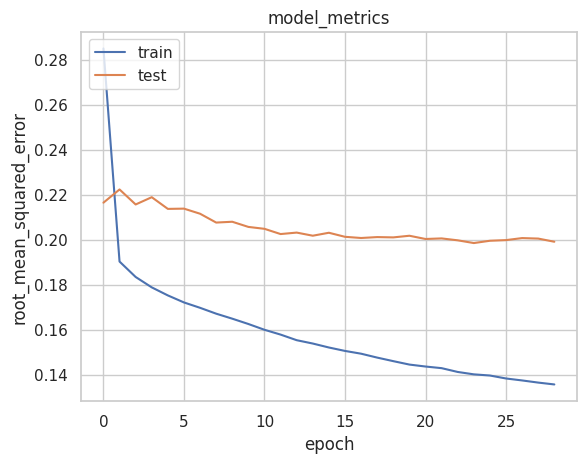

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Proses training model cukup smooth dan model konvergen pada epochs sekitar 29. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.13 dan error pada data validasi sebesar 0.19. Nilai tersebut cukup bagus untuk sistem rekomendasi.

In [ ]:
def precision_recall_at_k(model, x_val, y_val, k=10):
    # Asumsikan x_val bentuknya [user_id, book_id], dan y_val adalah rating sebenarnya
    hit = 0
    total_recommended = 0
    total_relevant = 0

    user_ids = np.unique(x_val[:, 0])

    for user_id in user_ids:
        # Ambil semua data val user ini
        idx = x_val[:, 0] == user_id
        books = x_val[idx, 1]
        ratings_true = y_val[idx]

        if len(books) < k:
            continue

        # Prediksi untuk semua buku milik user ini
        input_pairs = np.hstack((np.full((len(books), 1), user_id), books.reshape(-1, 1)))
        preds = model.predict(input_pairs).flatten()

        # Ambil Top-K
        top_k_idx = preds.argsort()[-k:][::-1]
        recommended_ratings = ratings_true[top_k_idx]

        # Asumsikan rating > 0.5 adalah relevan
        hit += np.sum(recommended_ratings >= 0.5)
        total_recommended += k
        total_relevant += np.sum(ratings_true >= 0.5)

    precision = hit / total_recommended
    recall = hit / total_relevant
    return precision, recall

precision, recall = precision_recall_at_k(model, x_val, y_val, k=10)
print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Precision@10: 0.8389
Recall@10: 0.6089


Hasil:

- Precision@10: 0.8389 — 84% dari top-10 rekomendasi sesuai preferensi pengguna.

- Recall@10: 0.6089 — sistem berhasil merekomendasikan lebih dari 60% buku yang relevan.

### Inference

In [ ]:
book_df = book_new
df = filtered_book_rating[['User-ID', 'ISBN', 'Book-Rating']].copy()

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_rated_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~)
book_not_rated = book_df[~book_df['id'].isin(book_rated_by_user['ISBN'].values)]['id']
book_not_rated = list(
    set(book_not_rated)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_rated = [[book_to_book_encoded.get(x)] for x in book_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_rated), book_not_rated)
)

In [ ]:
ratings = model.predict(user_book_array).flatten()

top_ratings_features = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_rated[x][0]) for x in top_ratings_features
]

print('Showing recommendations for users: {}'.format(user_id))
print('====' * 8)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_rated_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(f"Judul     : {row.book_title}")
    print(f"Penulis   : {row.book_author}")
    print(f"Penerbit  : {row.publisher}")
    print("----" * 8)

print('====' * 8)
print('Top 10 book recommendation')
print('====' * 8)

recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(f"Judul     : {row.book_title}")
    print(f"Penulis   : {row.book_author}")
    print(f"Penerbit  : {row.publisher}")
    print("----" * 8)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Showing recommendations for users: 243891
Book with high ratings from user
--------------------------------
Judul     : Tears of the Giraffe (No.1 Ladies Detective Agency)
Penulis   : Alexander McCall Smith
Penerbit  : Anchor
--------------------------------
Judul     : The Secret Life of Bees
Penulis   : Sue Monk Kidd
Penerbit  : Penguin Books
--------------------------------
Judul     : Empire Falls
Penulis   : Richard Russo
Penerbit  : Vintage Books USA
--------------------------------
Judul     : Timeline
Penulis   : MICHAEL CRICHTON
Penerbit  : Ballantine Books
--------------------------------
Top 10 book recommendation
Judul     : Charlotte's Web (Trophy Newbery)
Penulis   : E. B. White
Penerbit  : HarperTrophy
--------------------------------
Judul     : Harry Potter and the Prisoner of Azkaban (Book 3)
Penulis   : J. K. Rowling
Penerbit  : Scholastic
--------------------------------
Judul     : Harry Potter and the Goblet of Fire (Book 4)

# Kesimpulan
Dalam proyek ini, sistem rekomendasi buku dibangun untuk membantu pengguna menemukan buku yang sesuai dengan minat mereka di tengah banyaknya pilihan yang tersedia. Melalui dua pendekatan, yaitu content-based filtering dan collaborative filtering berbasis deep learning, sistem mampu memberikan rekomendasi yang akurat dan relevan.

Model collaborative filtering menunjukkan performa sangat baik dengan nilai RMSE rendah (0.1991) dan Precision@10 serta Recall@10 yang tinggi (0.8389 dan 0.6089), yang menunjukkan bahwa sistem dapat memberikan rekomendasi personal yang efektif dan efisien.

Sementara itu, content-based filtering berhasil menghasilkan rekomendasi yang konsisten dan relevan berdasarkan fitur konten buku, seperti judul dan nama penulis. Dengan precision 1.0, sistem mampu memberikan hasil yang cukup relevan tanpa bergantung pada data pengguna lain.

Secara keseluruhan, kedua pendekatan saling melengkapi dan dapat digunakan dalam kombinasi (hybrid) untuk meningkatkan kualitas sistem rekomendasi buku secara keseluruhan.

